## **Bank Customer Analysis: Classification**

|| **Banking a Classification Model to Predict which bank customers are most likely to churn** ||

##**Objective 1: Checking Multicolinearity of the Data**

In [1]:
# It's a different session and load the saved 'modeling_df' data again
import pandas as pd
modeling_df = pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction/modelling_df.csv')
modeling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male,Balance_vs_Salary
0,0.00,1,2,1,619,42.0,101348.88,1,1,0,0,0,0.000000
1,83807.86,1,1,0,608,41.0,112542.58,1,1,0,1,0,0.744677
2,159660.80,3,8,1,502,42.0,113931.57,0,0,0,0,0,1.401375
3,0.00,2,1,0,699,39.0,93826.63,0,0,0,0,0,0.000000
4,125510.82,1,2,0,850,43.0,79084.10,1,1,0,1,0,1.587055


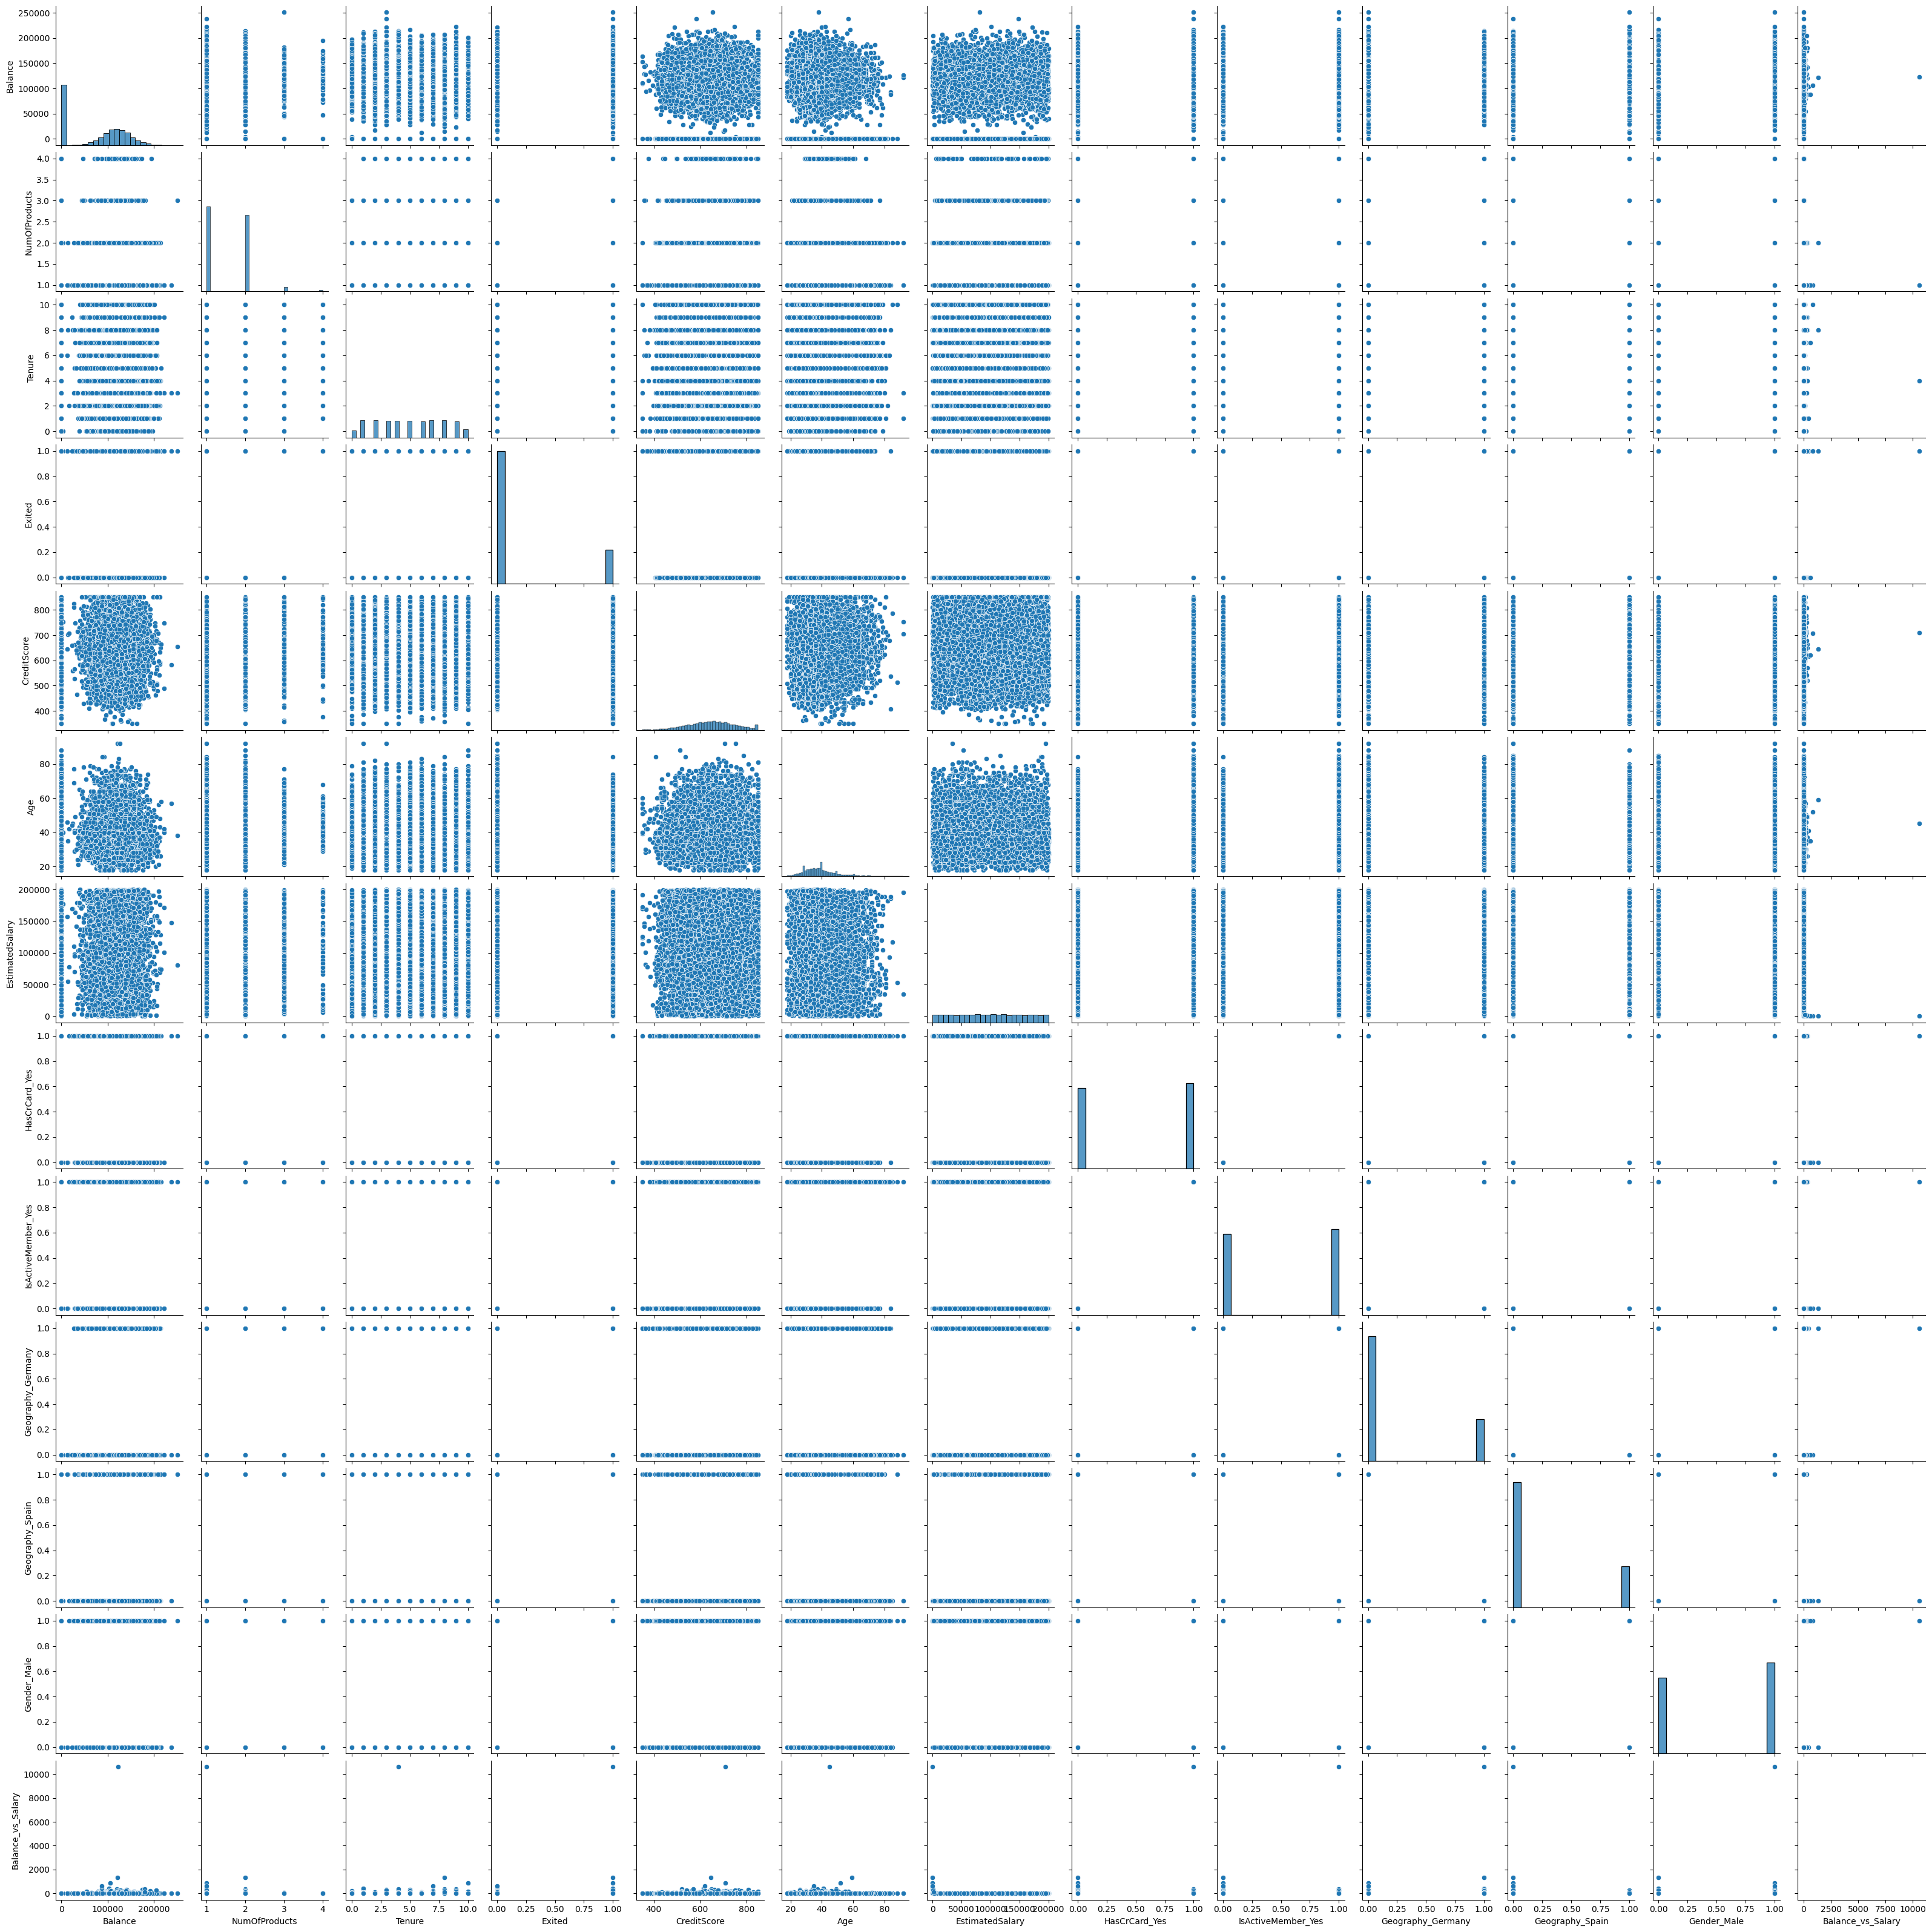

In [2]:
# let's check there is any potential multicolinearity through pair plot
# create the pairplot for numeric variables only
numeric_col = modeling_df.select_dtypes(include=['number']).columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(modeling_df[numeric_col])
plt.show();

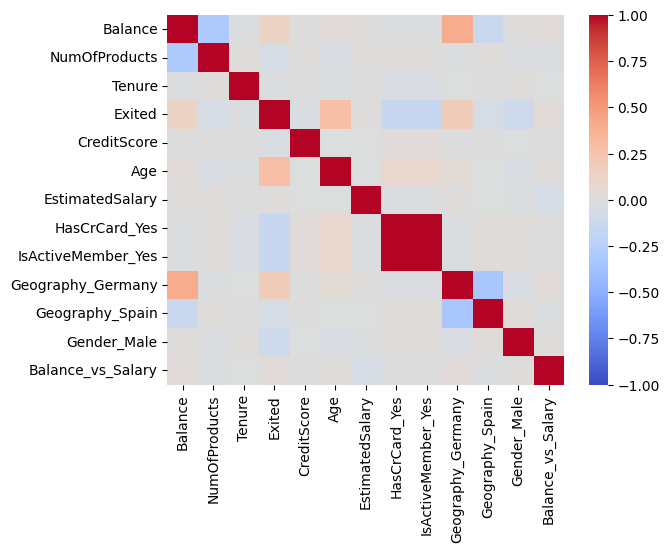

In [3]:
sns.heatmap(modeling_df.corr(numeric_only=True),vmin=-1,vmax=1,cmap='coolwarm',annot=False);

##**Objective 2: More Feature Engineering & Train-Test Spilit**

Our Second Objective is to prepare the data for modeling through feature selection, feature engineering, data splitting.
* Create a new column, 'income_v_products', by dividing 'EstimatedSalary' by 'NumOfProducts'.
* Split the data into train and test sets, with 20% of the rows in the test set.

In [4]:
modeling_df['income_v_products'] = modeling_df['EstimatedSalary'] / modeling_df['NumOfProducts']
modeling_df.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male,Balance_vs_Salary,income_v_products
0,0.00,1,2,1,619,42.0,101348.88,1,1,0,0,0,0.000000,101348.880
1,83807.86,1,1,0,608,41.0,112542.58,1,1,0,1,0,0.744677,112542.580
2,159660.80,3,8,1,502,42.0,113931.57,0,0,0,0,0,1.401375,37977.190
3,0.00,2,1,0,699,39.0,93826.63,0,0,0,0,0,0.000000,46913.315
4,125510.82,1,2,0,850,43.0,79084.10,1,1,0,1,0,1.587055,79084.100


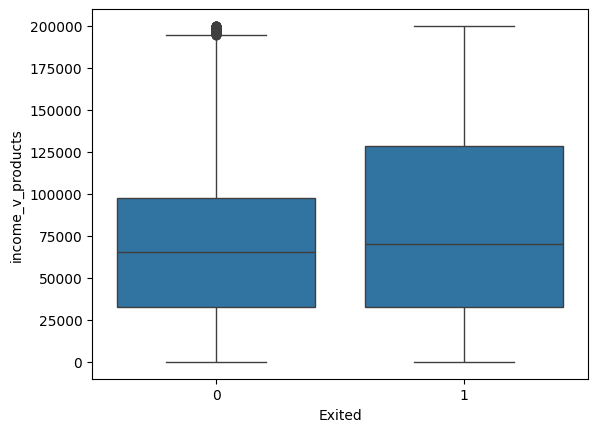

In [5]:
sns.boxplot(x='Exited', y='income_v_products', data=modeling_df);

In [6]:
from os import X_OK
# Now we split our data into Train and Test Set
from sklearn.model_selection import train_test_split
X = modeling_df.drop(columns=['Exited'],axis=1)
y = modeling_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balance             8000 non-null   float64
 1   NumOfProducts       8000 non-null   int64  
 2   Tenure              8000 non-null   int64  
 3   CreditScore         8000 non-null   int64  
 4   Age                 8000 non-null   float64
 5   EstimatedSalary     8000 non-null   float64
 6   HasCrCard_Yes       8000 non-null   int64  
 7   IsActiveMember_Yes  8000 non-null   int64  
 8   Geography_Germany   8000 non-null   int64  
 9   Geography_Spain     8000 non-null   int64  
 10  Gender_Male         8000 non-null   int64  
 11  Balance_vs_Salary   8000 non-null   float64
 12  income_v_products   8000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 875.0 KB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 6252 to 6929
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balance             2000 non-null   float64
 1   NumOfProducts       2000 non-null   int64  
 2   Tenure              2000 non-null   int64  
 3   CreditScore         2000 non-null   int64  
 4   Age                 2000 non-null   float64
 5   EstimatedSalary     2000 non-null   float64
 6   HasCrCard_Yes       2000 non-null   int64  
 7   IsActiveMember_Yes  2000 non-null   int64  
 8   Geography_Germany   2000 non-null   int64  
 9   Geography_Spain     2000 non-null   int64  
 10  Gender_Male         2000 non-null   int64  
 11  Balance_vs_Salary   2000 non-null   float64
 12  income_v_products   2000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 218.8 KB


##**Objective 3: Build & Evaluate a Logistic Regression Model**

Our Third Objective is to fit a Logistic Regression Model and Evaluate it by using a Confusion Matrix, ROC_Curve, Precision, Recall:
* Fit a Logistic Regression Model on our training data.
* Build a confusion matrix to evaluate our model.
* Calculate Accuracy, Precision, Recall, and F1 for our test data.
* Plot on ROC Curve and Calculate the AUC Statistics.
* Plot Precision and recall against the model threshold (set the threshold to the value where recall is the highest, but precision is still above 50%).

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [9]:
logreg = LogisticRegression()
lr = logreg.fit(X_train, y_train)

print(f'Train_Accuracy Score: {lr.score(X_train, y_train)}')
print(f'Test_Accuracy Score: {lr.score(X_test, y_test)}')

Train_Accuracy Score: 0.787625
Test_Accuracy Score: 0.802


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg = LogisticRegression(max_iter=10000)
lr = logreg.fit(X_train, y_train)

print(f'Train_Accuracy Score: {lr.score(X_train, y_train)}')
print(f'Test_Accuracy Score: {lr.score(X_test, y_test)}')

Train_Accuracy Score: 0.810625
Test_Accuracy Score: 0.819


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


See, The Accuracy has increased.

In [11]:
confusion_matrix(y_train, lr.predict(X_train))

array([[6099,  257],
       [1258,  386]])

In [12]:
print(f'Train_Accuracy Score: {lr.score(X_train, y_train)}')


Train_Accuracy Score: 0.810625


**Precision is the proportion of all the model's positive classifications that are actually positive.**
It is mathematically defined as:

Precision = TP/(TP+FP)

TP = TRUE POSITIVE

FP = FALSE POSITIVE

In [13]:
precision_score(y_train, lr.predict(X_train))

0.6003110419906688

**A recall score is a metric that measures how well a machine learning model identifies positive instances in a dataset.**

It's calculated by dividing the number of true positives by the total number of true positives by the total number of positive samples:

Recall = TP/(TP+FN)

TP = TRUE POSITIVE

FN = FALSE NEGATIVE

In [14]:
recall_score(y_train, lr.predict(X_train))

0.23479318734793186

In [15]:
# Let's check the Coefficients of the Model to find which Features have how much impact on our target variable
list(zip(X_train, lr.coef_[0]))

[('Balance', 1.1666595850652302e-07),
 ('NumOfProducts', 0.35698017040075375),
 ('Tenure', -0.03138139454413015),
 ('CreditScore', -0.0031503599905211227),
 ('Age', 0.06108776883225007),
 ('EstimatedSalary', -1.29487497738421e-05),
 ('HasCrCard_Yes', -0.5010047053888449),
 ('IsActiveMember_Yes', -0.5010047053888449),
 ('Geography_Germany', 1.1739456868328337),
 ('Geography_Spain', 0.37641640784375713),
 ('Gender_Male', -0.5055767436302993),
 ('Balance_vs_Salary', 0.0006130141763017523),
 ('income_v_products', 1.5632811314560136e-05)]

In [16]:
# let's calculate the accuracy metrics for test data
confusion_matrix(y_test, lr.predict(X_test))

array([[1546,   61],
       [ 301,   92]])

In [17]:
print(f'Test_Accuracy Score: {lr.score(X_test, y_test)}')

Test_Accuracy Score: 0.819


Accuracy didn't drop, hence, no overfitting.

In [18]:
precision_score(y_test, lr.predict(X_test))

0.6013071895424836

In [19]:
recall_score(y_test, lr.predict(X_test))

0.2340966921119593

Don't drop much.

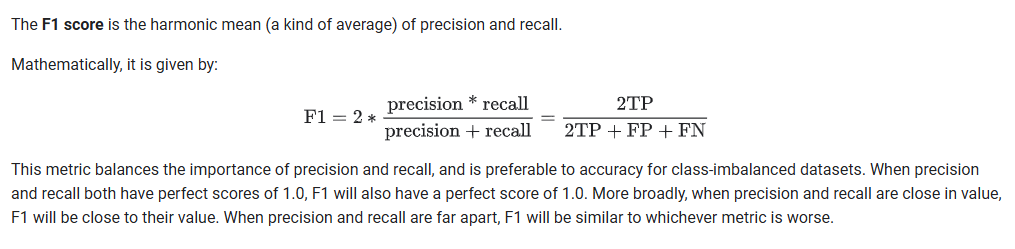

In [20]:
f1_score(y_test,lr.predict(X_test))

0.336996336996337

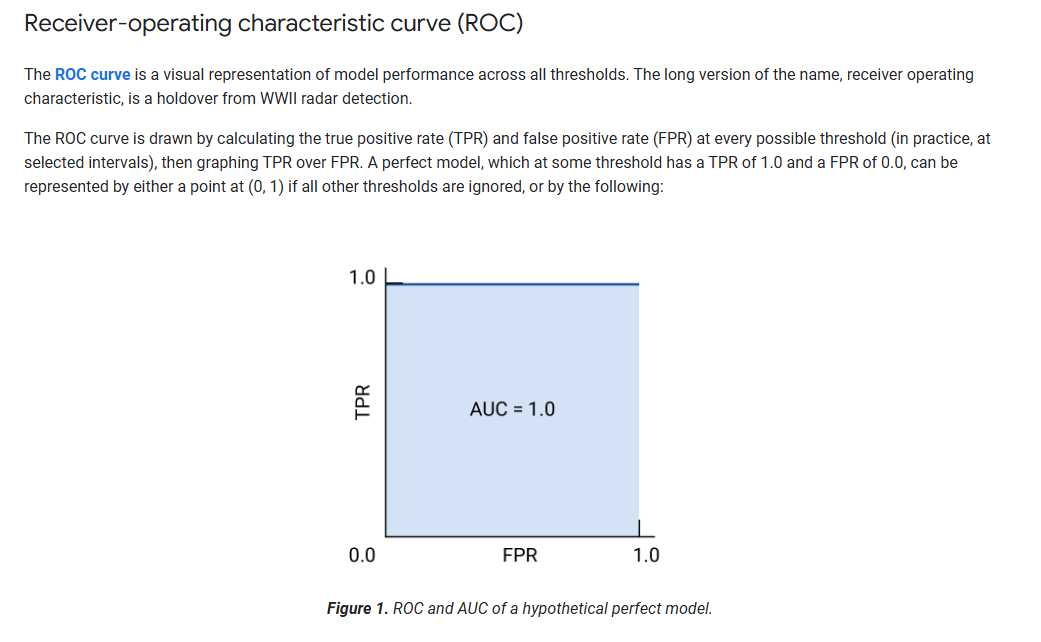

**Area under the curve (AUC):**

The area under the ROC curve (AUC) represents the probability that the model, if given a randomly chosen positive and negative example, will rank the positive higher than the negative.

The perfect model above, containing a square with sides of length 1, has an area under the curve (AUC) of 1.0. This means there is a 100% probability that the model will correctly rank a randomly chosen positive example higher than a randomly chosen negative example.

***In more concrete terms, a spam classifier with AUC of 1.0 always assigns a random spam email a higher probability of being spam than a random legitimate email. The actual classification of each email depends on the threshold that you choose.***

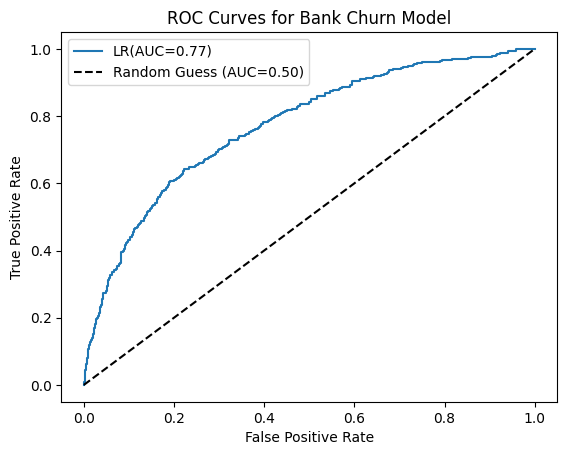

In [21]:
y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

#plot the roc curve
plt.plot(fpr, tpr, label=f'LR(AUC={roc_auc:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--',label='Random Guess (AUC=0.50)')

# Modify the formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Churn Model')
plt.legend()
plt.show();


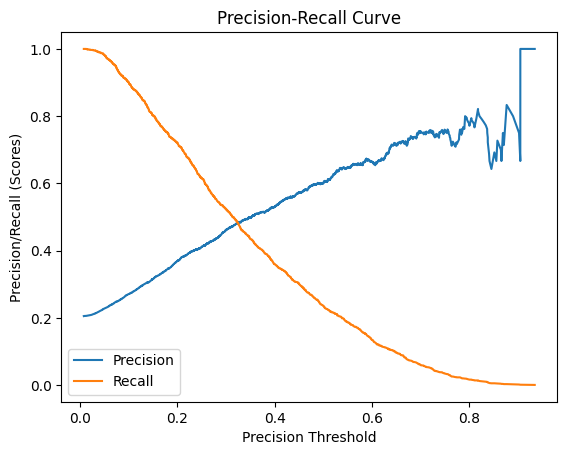

In [22]:
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:, 1])

#plot the curve
plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Precision Threshold')
plt.ylabel('Precision/Recall (Scores)')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show();



So, our is to find the point for Precision stays above 0.5 while maximizing our Recall. So, at the intersection point the Recall is about 50%, in another word, **We are going to capture 50% churners**.

In [23]:
import numpy as np
np.where(p_curve > 0.5)

(array([6577, 6578, 6579, ..., 7998, 7999, 8000]),)

In [24]:
t_curve[6377]

0.325530020673159

In [25]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:,1]>0.34)

array([[1412,  195],
       [ 206,  187]])

In [26]:
recall_score(y_test, lr.predict_proba(X_test)[:,1]>0.34)

0.4758269720101781

A big jump for our initial Recall Score. But it's going to be lower for Precision Score.

##**Objective 4: Fit & Tune a Random Forest Model**

Our Final objective is to fit a random forest model, tune it is using cross validation, and evaluate test accuracy, AUC score, and feature importance:
 * Fit a random forest model with default parameters.
 * Use cross validation to tune your model's hyperparameter.
 * Report the final test Accuracy and AUC score.
 * Build a bar chart that shows feature importance.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(X_train, y_train)

print(f'Train Accuracy: {rf.score(X_train, y_train)}')
print(f'Test Accuracy: {rf.score(X_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.866


**Random Forest is extremly overfit.**

**Hyperparameter Tuning:**

In [28]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=24, n_jobs=-1)

params = {
    'n_estimators':[100,300,500,700,800],
    'max_features': ['sqrt'],
    'bootstrap' : [True],
    'max_samples': [None,0.5],
    'max_depth': [5,7,9],
    'min_samples_leaf':[5,10,20]
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter = 50,
    scoring = 'accuracy'


)

grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 300,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': True}

In [29]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=24, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=700, stop=1000, step=100),
    'max_features': ['sqrt'],
    'bootstrap' : True,
    'max_samples': [None,0.3],
    'max_depth': np.arange(start=8, stop=10, step=1),
    'min_samples_leaf':[8,10,12]
}

grid = RandomizedSearchCV(
    rf,
    params,
    scoring = 'accuracy'


)

grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 900,
 'min_samples_leaf': 10,
 'max_samples': None,
 'max_features': 'sqrt',
 'max_depth': 8,
 'bootstrap': True}

In [31]:
rf = RandomForestClassifier(**{
    'n_estimators': 900,
    'max_features': 'sqrt',
    'bootstrap' : True,
    'max_samples': None,
    'max_depth': 9,
    'min_samples_leaf':10

})

rf = rf.fit(X_train, y_train)

print(f'Train Accuracy: {rf.score(X_train, y_train)}')
print(f'Test Accuracy: {rf.score(X_test, y_test)}')

Train Accuracy: 0.87375
Test Accuracy: 0.8605


In [32]:
y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

0.8687057735638135

**Feature Importance:**

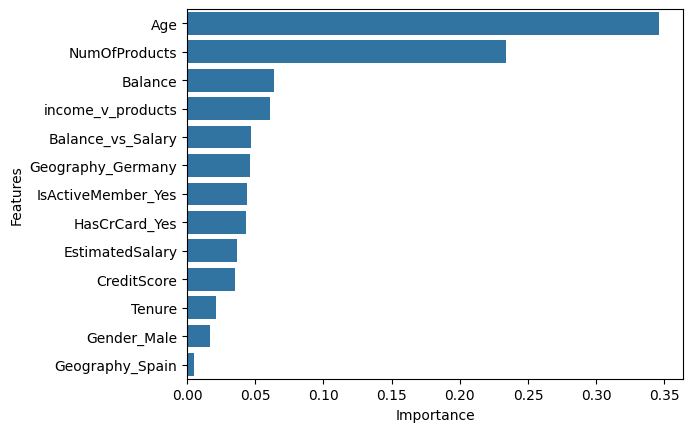

In [36]:
importance = pd.DataFrame(
    {
    'Features' : X_train.columns,
    'Importance' : rf.feature_importances_} # Changed 'feature_importance' to 'feature_importances_'
).sort_values(by='Importance', ascending=False).iloc[:20]

sns.barplot(data = importance, x='Importance', y='Features');

So, Age is the most influential Feature; Apart from that Number of Products, Balance, Geography of Germany, Active Member and some of our Engineered Features were found Important.

While Gender, Tenure, Credit Score do not impact Churning Status that much.